In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def plot_and_save_pie(y, mylabels, colors, myexplode):
    plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, colors=colors, autopct='%1.f%%')
    plt.legend(loc='best', labels=mylabels, fontsize='large')
    plt.suptitle('India vs Pakistan: T20 Head to Head', fontsize=12, fontweight='bold', x=0.5, y=0)
    plt.tight_layout()
    plt.savefig(r'C:\Users\Alok\Desktop\blog_images\indvpak.jpeg')
    plt.show()

In [3]:
def compare(df, team1, team2, rankings):
    try:
        tempdf = df[(df.team1.isin([team1, team2]))&df.team2.isin([team1, team2])]
        team1_win_prob = tempdf[tempdf.winner==team1].shape[0]/tempdf.shape[0]
        team2_win_prob = tempdf[tempdf.winner==team2].shape[0]/tempdf.shape[0]
    except:
        if rankings[team1] < rankings[team2]:
            return (1.0, 0.0)
        else:
            return (0.0, 1.0)
    return team1_win_prob , team2_win_prob

def get_winner(df, row, rankings):
    p1, p2 = compare(df, row.team1, row.team2, rankings)
    if p1>p2: return row.team1, p1
    if p1<p2: return row.team2, p2
    if p1 == p2:
        if rankings[row.team1] < rankings[row.team2]:
            return row.team1, 1.0
        else:
            return row.team2, 1.0
    return

In [4]:
teams_2021 = ["afghanistan","australia","bangladesh","england","india","ireland","namibia","netherlands","new zealand",\
             "oman","pakistan","papua new guinea","scotland","sri lanka","west indies"]

In [5]:
# loading dataset
df = pd.read_csv("C:/Users/Alok/Downloads/dataset/espn_data/complete_data/t20_2005_2021.csv")
phase1 = pd.read_csv("C:/Users/Alok/Downloads/dataset/Pred_Circakathon_Zephyrus_16102021.csv")

# rankings
rankings = pd.read_csv("C:/Users/Alok/Downloads/dataset/espn_data/complete_data/2021_t20_rankings.csv")
rankings = dict(zip(rankings['Team'].values, rankings['Pos'].values))

# dropping off columns that wont be used going forward.
df = df.drop(['match', 'ground'], axis=1)

# considering only "won" matches.
df = df[df.result == 'won']

# removing leading and trailing spaces.
df.team1 = df.team1.apply(lambda x: x.strip() if x!=None else np.nan)
df.team2 = df.team2.apply(lambda x: x.strip() if x!=None else np.nan)

In [6]:
# creating team1 and team2 colummns
phase1[['team1','team2']] = phase1.match.str.split(' vs ', expand=True)

# removing leading and trailing spaces.
phase1.team1 = phase1.team1.apply(lambda x: x.strip() if x!=None else np.nan)
phase1.team2 = phase1.team2.apply(lambda x: x.strip() if x!=None else np.nan)

phase1['prob'] = phase1.apply(lambda row : get_winner(df, row, rankings)[1], axis=1)
phase1['winner'] = phase1.apply(lambda row : get_winner(df, row, rankings)[0], axis=1)

In [7]:
tempdf = df[df.team1.isin(['india', 'pakistan']) & df.team2.isin(['india', 'pakistan'])]

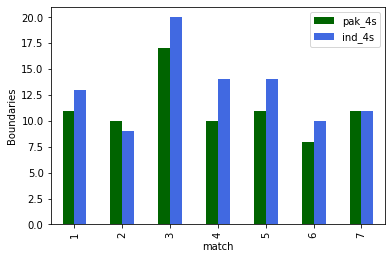

In [14]:
ind = tempdf[tempdf.team1 == 'india']
pak = tempdf[tempdf.team1 == 'pakistan']
ind.columns = [col.replace('team1','ind') if "team1" in col else col for col in ind.columns ]
ind.columns = [col.replace('team2','pak') if "team2" in col else col for col in ind.columns ]
pak.columns = [col.replace('team1','pak') if "team1" in col else col for col in pak.columns ]
pak.columns = [col.replace('team2','ind') if "team2" in col else col for col in pak.columns ]
ind = ind.rename(columns={'ind':'team1','pak':'team2'})
pak = pak.rename(columns={'ind':'team1','pak':'team2'})
indpak = pd.concat([ind,pak])
indpak = indpak[set(indpak.columns)-set(['result', 'margin', 'start date', 'id', 'team1', 'team2'])]
indpak = indpak.reset_index(drop=True)

#
indpak["match"] = indpak.index+1

In [9]:
# y = tempdf.winner.value_counts()
# mylabels = ["India", "Pakistan"]
# colors = ["#4169E1", "#006400"]
# myexplode = [0, 0.1]
# plot_and_save_pie(y, mylabels, colors, myexplode)

In [120]:
phase2 = pd.read_csv(r"C:/Users/Alok/Downloads/dataset/phase2.csv")
phase2.drop(["Time"], axis=1, inplace=True)
phase2.Match = phase2.Match.apply(str.lower)
phase2[['team1','team2']] = phase2.Match.str.split(" vs ",expand=True)
phase2['winner'] = phase2.apply(lambda row: get_winner(df, row, rankings)[0], axis=1)
phase2['prob'] = phase2.apply(lambda row: round(get_winner(df, row, rankings)[1],2), axis=1)
phase2.to_csv("C:/Users/Alok/Downloads/dataset/Pred_Circakathon_Zephyrus_23102021.csv")

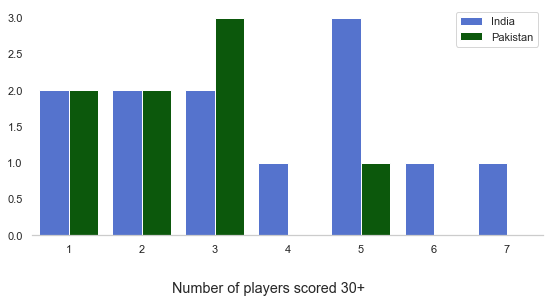

In [105]:
# import seaborn as sns
# sns.set_style("whitegrid", {'axes.grid' : False})
# t = indpak[['ind_30+','match','pak_30+']].melt('match')
# t["team"] = t.variable.apply(lambda x : 'India' if x.startswith('ind') else 'Pakistan')
# g = sns.catplot(
#     data=t, kind="bar",
#     x="match", y="value", hue="team",legend=False,
#     ci="sd", palette=["#4169E1","#006400"], alpha=1, height=4, aspect=2,
#     )
# (g.despine(left=True)
# .set(xlabel=None)
# .set(ylabel=None)
# .fig.suptitle('Number of players scored 30+',x=0.5,y=0))
# plt.legend(loc='best')
# g.savefig(r'C:\Users\Alok\Desktop\blog_images\indvpak_30+.jpeg')

In [134]:
#phase2 = pd.read_csv("C:/Users/Alok/Downloads/dataset/Pred_Circakathon_Zephyrus_23102021.csv")
phase2 = pd.read_csv(r"C:/Users/Alok/Downloads/dataset/vanilla_semi.csv")
phase2.drop(["Time"], axis=1, inplace=True)
phase2.Match = phase2.Match.apply(str.lower)
phase2[['team1','team2']] = phase2.Match.str.split(" vs ",expand=True)
phase2['winner'] = phase2.apply(lambda row: get_winner(df, row, rankings)[0], axis=1)
phase2['prob'] = phase2.apply(lambda row: round(get_winner(df, row, rankings)[1],2), axis=1)
#phase2.to_csv("C:/Users/Alok/Downloads/dataset/Pred_Circakathon_Zephyrus_23102021.csv")

In [135]:
phase2

,Date,Match,team1,team2,winner,prob
0,10-11-2021,australia vs pakistan,australia,pakistan,pakistan,0.57
1,11-11-2021,india vs west indies,india,west indies,india,0.62


In [136]:
#phase2 = pd.read_csv("C:/Users/Alok/Downloads/dataset/Pred_Circakathon_Zephyrus_23102021.csv")
phase2 = pd.read_csv(r"C:/Users/Alok/Downloads/dataset/final.csv")
phase2.drop(["Time"], axis=1, inplace=True)
phase2.Match = phase2.Match.apply(str.lower)
phase2[['team1','team2']] = phase2.Match.str.split(" vs ",expand=True)
phase2['winner'] = phase2.apply(lambda row: get_winner(df, row, rankings)[0], axis=1)
phase2['prob'] = phase2.apply(lambda row: round(get_winner(df, row, rankings)[1],2), axis=1)
#phase2.to_csv("C:/Users/Alok/Downloads/dataset/Pred_Circakathon_Zephyrus_23102021.csv")

In [137]:
phase2

,Date,Match,team1,team2,winner,prob
0,14-11-2021,india vs pakistan,india,pakistan,india,0.86
